In [25]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from random import randint
from math import sqrt
from sklearn.metrics import silhouette_score
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram, linkage

In [26]:
from google.colab import files
uploaded = files.upload()


Saving iris_org.txt to iris_org (1).txt
Saving 21D_data.txt to 21D_data (1).txt
Saving 4D_data.txt to 4D_data (1).txt
Saving 2D_data.txt to 2D_data (1).txt


**Pre-processing of data**

In [27]:
#pre-processing
read_file=open("4D_data.txt",'r')
read_content= read_file.read()

In [28]:
all_data= read_content.splitlines()
No_data_points=len(all_data)
print ("Number of the data points :- ", No_data_points)
features = all_data[0].split("\t")
No_of_features = len(features)
print ("Number the features/samples :- ", No_of_features)

Number of the data points :-  150
Number the features/samples :-  4


In [29]:
D=np.zeros((No_data_points,No_of_features))
counter = 0
for lines in all_data:
    values=lines.split('\t')
    for i in range(0,No_of_features):
        D[counter][i]= values[i]
    counter+=1
    
#print (D)

**Call hierarchical clustering, linkage can be = ['complete', 'average', 'ward']**


In [30]:
from sklearn import metrics
linkage_style= "average"

for i in range(2,4):
    agglomerative = cluster.AgglomerativeClustering(n_clusters=i, linkage=linkage_style, affinity='euclidean')
    idx = agglomerative.fit_predict(D)
    hlabels = agglomerative.labels_ 
    print (hlabels) 
    score = silhouette_score(D,hlabels)
    print ("Silhouette Score", score)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Silhouette Score 0.8871517527576847
[2 2 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2
 2 2 2 2 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Silhouette Score 0.8516942189352813


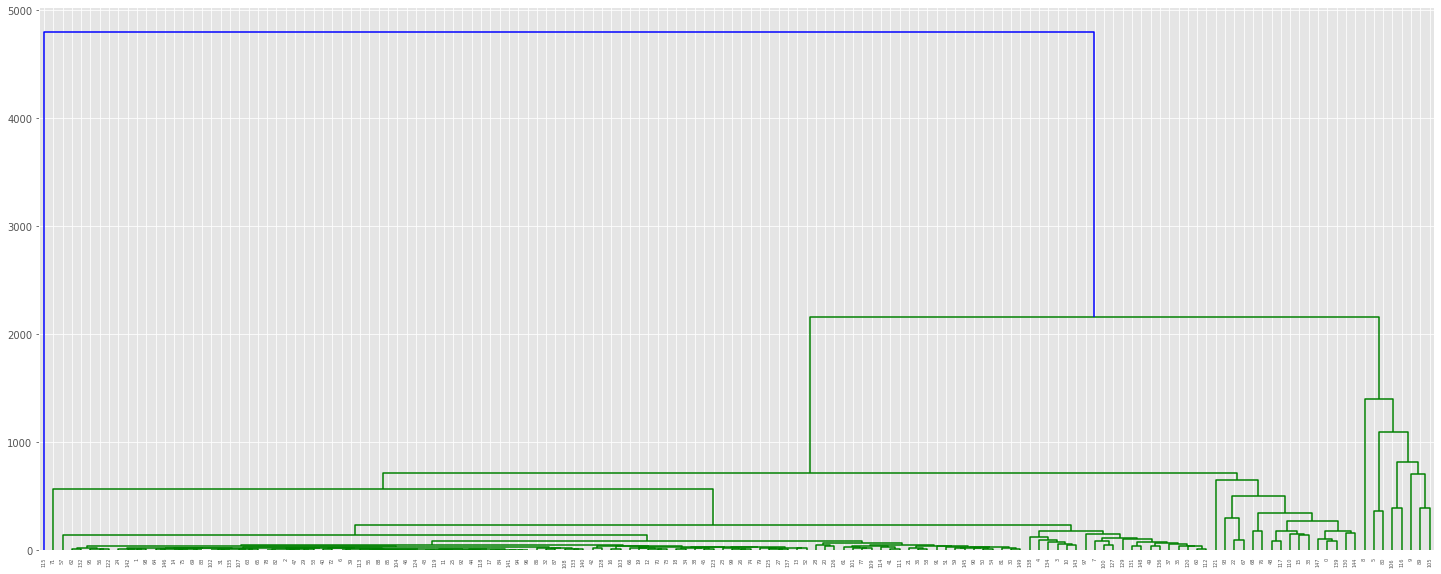

In [31]:
Z = linkage(D, linkage_style)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

**Iris dataset**

In [32]:
read_file=open("iris_org.txt",'r')
read_content= read_file.read()

all_data= read_content.splitlines()
No_data_points=len(all_data)
print ("Number of the data points :- ", No_data_points)
features = all_data[0].split("\t")
No_of_features = len(features)-1
print ("Number the features/samples :- ", No_of_features)

D=np.zeros((No_data_points,No_of_features))
true_label = []
counter = 0
for lines in all_data:
    values=lines.split('\t')
    for i in range(0,No_of_features):
        D[counter][i]= values[i]
    true_label.append(int(values[No_of_features]))     #
    counter+=1
#print (D)

Number of the data points :-  150
Number the features/samples :-  4


**Clustering on iris dataset**

In [33]:
from sklearn import metrics
linkage_style= "average"

for i in range(2,4):
    agglomerative = cluster.AgglomerativeClustering(n_clusters=i, linkage=linkage_style, affinity='euclidean')
    idx = agglomerative.fit_predict(D)
    hlabels = agglomerative.labels_ 
    print (hlabels) 
    score = silhouette_score(D,hlabels)
    ARI=metrics.adjusted_rand_score(true_label, hlabels)
    print ("Silhouette Score", score)
    print ("ARI Score",ARI)

[1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0]
Silhouette Score 0.6867350732769776
ARI Score 0.5681159420289855
[1 0 2 1 0 0 1 0 2 1 0 2 1 0 2 1 0 2 1 0 0 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1
 0 2 1 0 0 1 0 0 1 0 2 1 0 2 1 0 2 1 0 2 1 0 0 1 0 2 1 0 0 1 0 2 1 0 0 1 0
 2 1 0 2 1 0 0 1 0 0 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 0 1 0 2 1 0 2 1 0 2
 1 0 2 1 0 0 1 0 2 1 0 2 1 0 2 1 0 0 1 0 2 1 0 2 1 0 2 1 0 0 1 0 2 1 0 2 1
 0 0]
Silhouette Score 0.5541608580282847
ARI Score 0.7591987071071522
